In [4]:
import numpy as np

import pandas as pd

import altair as alt

import matplotlib
import matplotlib.pyplot as plt

import bokeh
import bokeh.plotting
from bokeh.plotting import ColumnDataSource
from bokeh.models import LabelSet
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [5]:
df13 = pd.read_csv('190505_DCHC_Transfer_SP_02_well_13DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

df14 = pd.read_csv('190505_DCHC_Transfer_SP_02_well_14DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

df16 = pd.read_csv('190505_DCHC_Transfer_SP_02_well_16DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

df17 = pd.read_csv('190505_DCHC_Transfer_SP_02_well_17DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

df20 = pd.read_csv('190505_DCHC_Transfer_SP_02_well_20DeepCut_resnet50_DCHC_transfer_analysis_PSep11shuffle1_80000.csv',header=[1,2])

In [21]:
df13

bodyparts     anthead                          antgaster              \
         coords           x           y likelihood           x           y   
0             0  177.681710  351.656022   1.000000  229.658832  295.643090   
1             1  173.412644  346.542670   0.999999  229.710481  295.673130   
2             2  160.180760  324.511818   1.000000  232.462389  298.409430   
3             3  156.620908  327.263294   1.000000  231.276376  300.657834   
4             4  151.415668  305.699879   1.000000  226.710023  309.365100   
5             5  148.386062  310.322663   1.000000  226.072732  310.200585   
6             6  147.569462  334.022308   1.000000  222.877694  309.135723   
7             7  147.219918  335.375945   1.000000  222.343737  309.219976   
8             8  145.174522  301.339048   0.999998  221.399674  313.107895   
9             9  146.388983  283.298444   1.000000  212.379039  315.298610   
10           10  141.043028  294.664514   1.000000  212.006110  315.956777   
11           11  144.274123  295.927982   0.999999  216.382167  316.857288   
12           12  179.420618  266.169111   1.000000  210.924609  329.334606   
13           13  177.825379  264.875535   0.999999  209.382876  330.295576   
14           14  200.126987  260.662799   1.000000  203.486477  328.577321   
15           15  212.639345  261.444403   1.000000  199.863456  330.000987   
16           16  202.661767  259.179301   1.000000  198.627715  329.835168   
17           17  194.382417  256.562617   1.000000  199.767802  328.474315   
18           18  197.001199  255.778153   1.000000  199.823445  328.052306   
19           19  215.585033  254.331985   1.000000  196.382196  322.165998   
20           20  238.691776  264.555051   0.999996  193.212884  317.552042   
21           21  233.903772  258.091923   0.999998  193.055149  317.586587   
22           22  223.466458  254.125028   0.999999  188.386099  312.725307   
23           23  222.414710  256.078109   0.999994  187.048483  315.900200   
24           24  226.027156  261.214434   1.000000  186.046517  316.911146   
25           25  243.572087  281.203499   1.000000  182.682674  317.235933   
26           26  251.813954  297.460527   0.999999  176.563953  311.785812   
27           27  246.022521  290.328289   1.000000  173.847293  310.312930   
28           28  237.633146  281.065887   0.999999  170.659937  315.743230   
29           29  240.334802  291.266419   1.000000  168.795066  315.723996   
...         ...         ...         ...        ...         ...         ...   
81615     81615  138.331611  236.656082   0.999833  209.808923  228.092534   
81616     81616  137.126083  236.136094   0.999461  208.924269  225.829448   
81617     81617  134.585171  214.098757   0.572745  199.194888  220.798261   
81618     81618  115.982840  198.027616   0.997809  188.251626  218.484737   
81619     81619  112.217781  200.043005   0.995860  180.790377  213.971712   
81620     81620  118.157293  192.098130   0.999979  187.662350  211.968639   
81621     81621  114.855460  202.059981   0.645056  194.575276  211.239131   
81622     81622  115.964933  197.336618   0.996942  194.258075  211.861367   
81623     81623  117.841386  194.093648   0.999934  190.207069  210.795456   
81624     81624  127.899721  176.541459   0.999997  188.239655  213.705971   
81625     81625  116.665005  194.443861   0.999350  188.350627  211.438245   
81626     81626  134.770135  217.192391   0.477501  197.927940  206.547367   
81627     81627  178.406938  266.387280   1.000000  181.015987  196.724421   
81628     81628  214.293019  246.598526   1.000000  174.455866  187.183669   
81629     81629  172.199205  280.078831   1.000000  175.572374  208.343995   
81630     81630  171.574607  303.205182   0.999999  175.269064  232.665899   
81631     81631  138.272739  226.090633   0.998972  206.847614  212.622710   
81632     81632  157.660840  171.670034   0.999996  186.510147  236.371137   
81633     81633  247.872920 

In [6]:
df_list = [df13,
           df14,
           df16,
           df17,
           df20]

In [7]:
for i,df in enumerate(df_list):
    df['antlength'] = np.sqrt((df['anthead']['x'] - df['antgaster']['x'])**2 + 
                              (df['anthead']['y'] - df['antgaster']['y'])**2)
    
bars = [[100,30],
        [110,40],
        [110,40],
        [110,40],
        [110,40]]

In [26]:
plots = []
for i,df in enumerate(df_list):

    p = bokeh.plotting.figure(plot_width=600,
                          plot_height=400,
                          x_axis_label='time, s',
                          y_axis_label='length, pixels')


    p.circle(df['bodyparts']['coords'],df['antlength'],
         color='Blue',legend='ant length',alpha=0.1)

    p.line([0,80000],[bars[i][0],bars[i][0]],line_width=5,color='red')
    p.line([0,80000],[bars[i][1],bars[i][1]],line_width=5,color='red')
    
    plots.append(p)
bokeh.io.show(bokeh.layouts.column(plots))

In [9]:
for i,df in enumerate(df_list):
    df['good frames'] = (df['antlength'] < bars[i][0]) & (df['antlength'] > bars[i][1])   

In [10]:
df_list[4]['good frames'] = df_list[4]['good frames'] * (df_list[4]['bodyparts']['coords'] < 24450)

/Users/TomNaragon/anaconda3/envs/mainEnv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [16]:
for i,df in enumerate(df_list):
    avgLen = np.average(df['antlength'].loc[df['good frames']])
    df['touching'] = False

    df['head2head'] = np.sqrt((df['beetlehead']['x'] - df['anthead']['x'])**2 + 
                              (df['beetlehead']['y'] - df['anthead']['y'])**2)
        
    df['head2butt'] = np.sqrt((df['beetlehead']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetlehead']['y'] - df['antgaster']['y'])**2)
    
    df['butt2head'] = np.sqrt((df['beetleabdomen']['x'] - df['anthead']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['anthead']['y'])**2)
        
    df['butt2butt'] = np.sqrt((df['beetleabdomen']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['antgaster']['y'])**2)
    
    headEllipse=df['head2head'] + df['head2butt']
    buttEllipse=df['butt2head'] + df['butt2butt']
    
    df['ellipse distance'] = headEllipse*(headEllipse<buttEllipse) + buttEllipse*(buttEllipse<headEllipse)
    
    df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])*df['good frames']) \
                        | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))\
                        | ((df['butt2head']<avgLen) | (df['butt2butt']<avgLen))

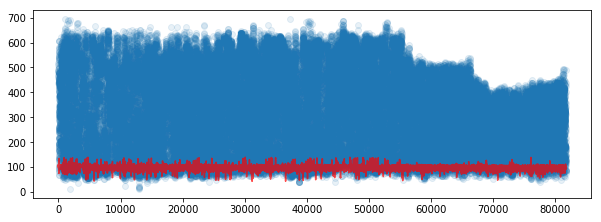

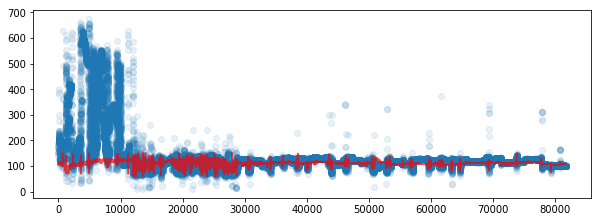

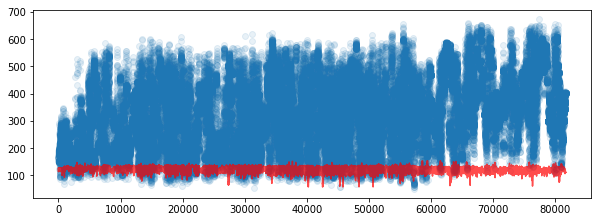

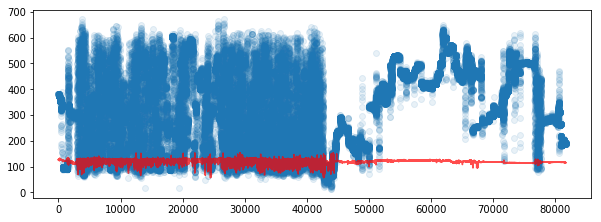

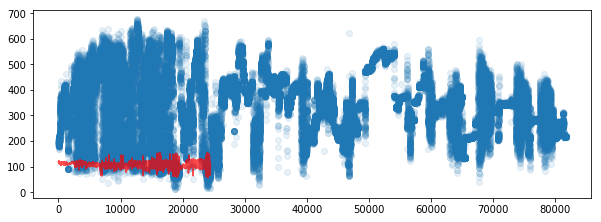

In [24]:
for i,df in enumerate(df_list):
    subplt = int('51' + str(i+1))
    plt.figure(figsize=(10,20))
    plt.subplot(subplt)
    plt.scatter(df['bodyparts']['coords'],df['ellipse distance'],alpha=0.1)
    plt.plot((df['bodyparts']['coords']).loc[df['good frames']],df['antlength'].loc[df['good frames']]*1.4,color='red',alpha=0.7)

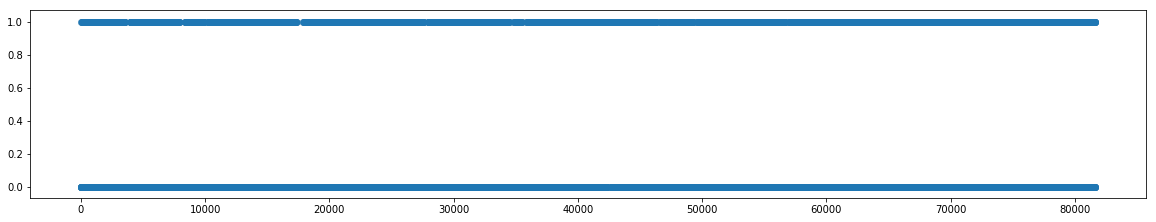

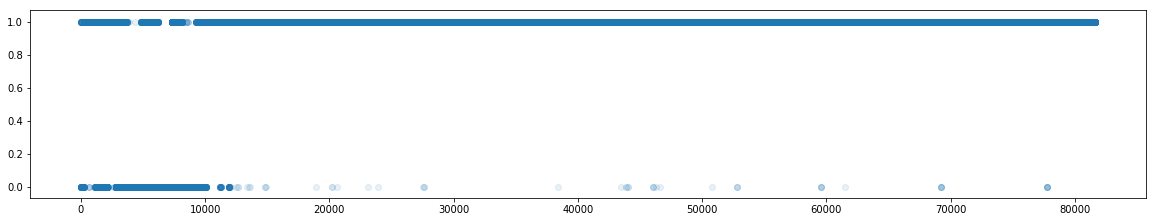

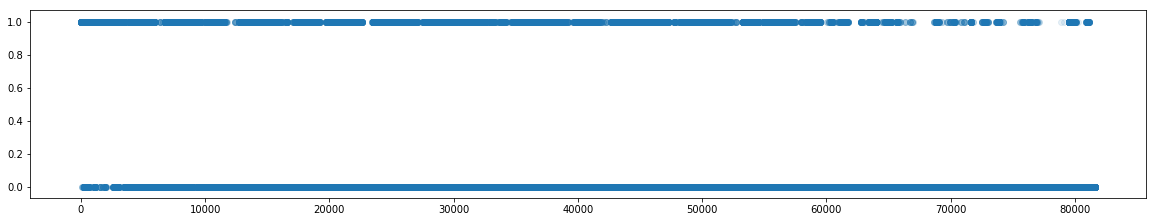

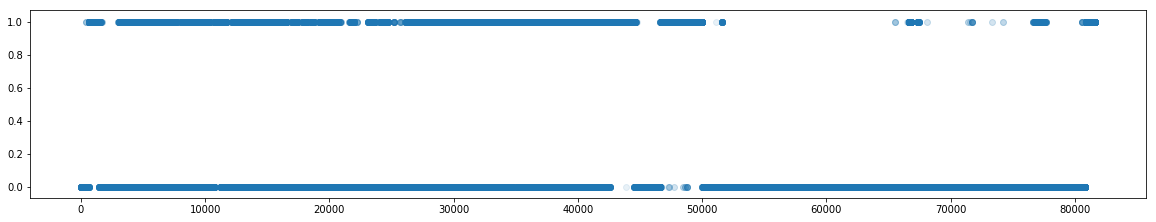

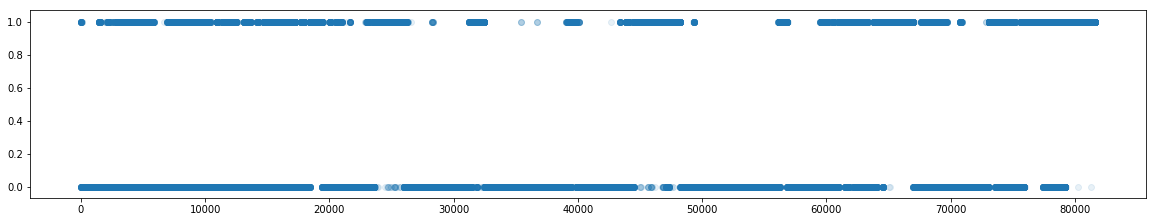

In [18]:
for i,df in enumerate(df_list):
    subplt = int('51' + str(i+1))
    plt.figure(figsize=(20,20))
    plt.subplot(subplt)
    plt.scatter(df['bodyparts']['coords'],df['touching'],alpha=0.1)

In [19]:
contact_time=[]
for i,df in enumerate(df_list):
    contact_time.append(sum(df['touching'])/len(df))

In [20]:
contact_time

[0.29994488333639535,
 0.9203502970175761,
 0.2672300814501807,
 0.2902321023945128,
 0.3128544307673464]

In [31]:
def ecdf_func(x):
    return np.sort(x), np.arange(len(x))/len(x)

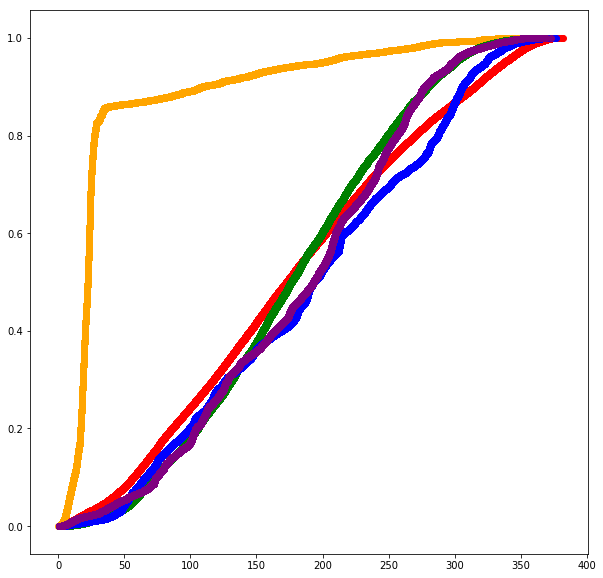

In [40]:
p = bokeh.plotting.figure(plot_width=600,
                          plot_height=400,
                          x_axis_label='distance',
                          y_axis_label='ECDF')

colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(10,10))
for i,df in enumerate(df_list):
    x_val,y_val=ecdf_func(df['head2head'])
    
    plt.scatter(x_val,y_val,color=colors[i])

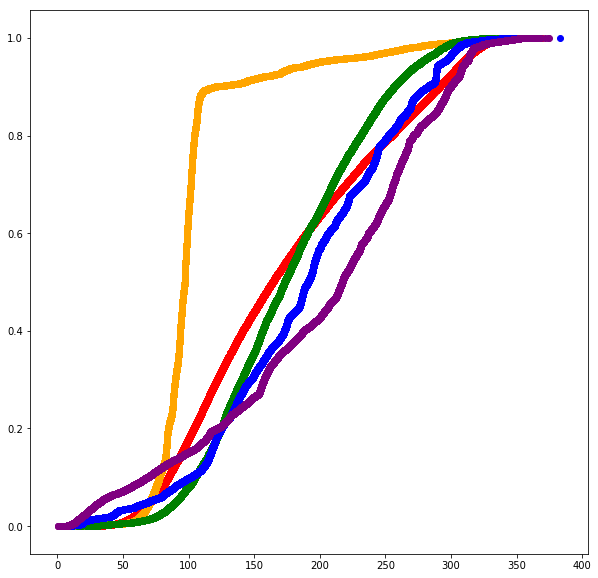

In [41]:
p = bokeh.plotting.figure(plot_width=600,
                          plot_height=400,
                          x_axis_label='distance',
                          y_axis_label='ECDF')

colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(10,10))
for i,df in enumerate(df_list):
    x_val,y_val=ecdf_func(df['head2butt'])
    
    plt.scatter(x_val,y_val,color=colors[i])